In [96]:
import pandas as pd
import requests
import re
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playbyplayv3

In [2]:
headers  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

In [19]:
def get_player_data(player_id):
    player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id, headers=headers, timeout=100)
    df = player_info.common_player_info.get_data_frame()
    return df

In [21]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

In [27]:
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable='2024-25', league_id_nullable='00', season_type_nullable='Playoffs')
games = gamefinder.get_data_frames()[0]
# games.head()
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42024,1610612754,IND,Indiana Pacers,0042400305,2025-05-29,IND @ NYK,L,240,94,...,0.828,8,32,40,20,10,7,20,22,-17.0
1,42024,1610612752,NYK,New York Knicks,0042400305,2025-05-29,NYK vs. IND,W,241,111,...,0.682,11,34,45,22,11,3,15,22,17.0
2,42024,1610612750,MIN,Minnesota Timberwolves,0042400315,2025-05-28,MIN @ OKC,L,241,94,...,0.800,8,31,39,16,7,6,21,20,-30.0
3,42024,1610612760,OKC,Oklahoma City Thunder,0042400315,2025-05-28,OKC vs. MIN,W,238,124,...,0.857,7,39,46,26,14,8,14,20,30.0
4,42024,1610612752,NYK,New York Knicks,0042400304,2025-05-27,NYK @ IND,L,240,121,...,0.846,13,31,44,17,7,4,17,27,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,42024,1610612743,DEN,Denver Nuggets,0042400171,2025-04-19,DEN vs. LAC,W,264,112,...,0.778,12,33,45,24,11,1,11,18,2.0
148,42024,1610612749,MIL,Milwaukee Bucks,0042400131,2025-04-19,MIL @ IND,L,241,98,...,0.679,8,33,41,15,4,3,10,20,-19.0
149,42024,1610612765,DET,Detroit Pistons,0042400121,2025-04-19,DET @ NYK,L,241,112,...,0.750,11,26,37,23,6,9,19,21,-11.0
150,42024,1610612746,LAC,LA Clippers,0042400171,2025-04-19,LAC @ DEN,L,264,110,...,0.750,11,33,44,25,7,6,20,25,-2.0


In [100]:
knicks_pacers = ['NYK @ IND', 'NYK vs. IND']
games = games[games['MATCHUP'].isin(knicks_pacers)]
game_ids = games['GAME_ID'].unique().tolist()
game_ids

['0042400305', '0042400304', '0042400303', '0042400302', '0042400301']

In [113]:
games = []
for id in game_ids:
    pbp = playbyplayv3.PlayByPlayV3(id)
    pbp = pbp.get_data_frames()[0]
    games.append(pbp)
pbp = pd.concat(games, ignore_index=True)
pbp

,gameId,actionNumber,clock,period,teamId,teamTricode,personId,playerName,playerNameI,xLegacy,...,scoreHome,scoreAway,pointsTotal,location,description,actionType,subType,videoAvailable,shotValue,actionId
0,0042400305,2,PT12M00.00S,1,0,,0,,,0,...,0,0,0,,Start of 1st Period (8:06 PM EST),period,start,0,0,1
1,0042400305,4,PT12M00.00S,1,1610612752,NYK,1629011,Robinson,M. Robinson,0,...,,,0,h,Jump Ball Robinson vs. Turner: Tip to Brunson,Jump Ball,,1,0,2
2,0042400305,7,PT11M42.00S,1,1610612752,NYK,1628973,Brunson,J. Brunson,11,...,2,0,2,h,Brunson 8' Driving Floating Jump Shot (2 PTS) ...,Made Shot,Driving Floating Jump Shot,1,2,3
3,0042400305,9,PT11M28.00S,1,1610612754,IND,1626167,Turner,M. Turner,0,...,,,0,v,Turner Traveling Turnover (P1.T1),Turnover,Traveling,1,0,4
4,0042400305,10,PT11M06.00S,1,1610612752,NYK,1628973,Brunson,J. Brunson,107,...,4,0,4,h,Brunson 11' Step Back Jump Shot (4 PTS),Made Shot,Step Back Jump shot,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,0042400301,838,PT00M00.20S,5,1610612752,NYK,1628973,Brunson,J. Brunson,0,...,,,0,h,SUB: McBride FOR Brunson,Substitution,,0,0,581
2572,0042400301,839,PT00M00.20S,5,1610612754,IND,1641767,Sheppard,B. Sheppard,0,...,,,0,v,SUB: Haliburton FOR Sheppard,Substitution,,0,0,582
2573,0042400301,842,PT00M00.20S,5,1610612754,IND,1630169,Haliburton,T. Haliburton,0,...,,,0,v,Haliburton Bad Pass Turnover (P2.T7),Turnover,Bad Pass,1,0,583
2574,0042400301,842,PT00M00.20S,5,1610612752,NYK,1626157,Towns,K. Towns,0,...,,,0,h,Towns STEAL (1 STL),,,1,0,584


In [114]:
def parse_iso_time(duration_str):
    match = re.match(r"PT(\d+)M([\d.]+)S", duration_str)
    if match:
        minutes = int(match.group(1))
        seconds = float(match.group(2))
        return minutes * 60 + seconds
    else:
        return None

In [115]:
clutch = pbp[pbp['period'] >= 4]
clutch = clutch.copy()
clutch['clock_secs'] = clutch['clock'].apply(parse_iso_time)
clutch['scoreHome'] = pd.to_numeric(clutch['scoreHome'], errors='coerce')
clutch['scoreAway'] = pd.to_numeric(clutch['scoreAway'], errors='coerce')
clutch['point_dif'] = clutch.scoreHome - clutch.scoreAway
clutch['point_dif'] = clutch['point_dif'].ffill()
clutch = clutch[(clutch['clock_secs'] <= 300) & (clutch['point_dif'].abs() <= 5)]
clutch

,gameId,actionNumber,clock,period,teamId,teamTricode,personId,playerName,playerNameI,xLegacy,...,pointsTotal,location,description,actionType,subType,videoAvailable,shotValue,actionId,clock_secs,point_dif
1456,0042400303,580,PT04M57.00S,4,1610612754,IND,1629614,Nembhard,A. Nembhard,-49,...,0,h,MISS Nembhard 9' Pullup Jump Shot,Missed Shot,Pullup Jump shot,1,2,428,297.0,-4.0
1457,0042400303,581,PT04M54.00S,4,1610612752,NYK,1626157,Towns,K. Towns,0,...,0,v,Towns REBOUND (Off:1 Def:13),Rebound,Unknown,1,0,429,294.0,-4.0
1458,0042400303,583,PT04M33.00S,4,1610612752,NYK,1626157,Towns,K. Towns,0,...,0,v,Towns Traveling Turnover (P5.T13),Turnover,Traveling,1,0,430,273.0,-4.0
1459,0042400303,584,PT04M18.00S,4,1610612754,IND,1627783,Siakam,P. Siakam,-120,...,186,h,Siakam 13' Turnaround Fadeaway Bank Jump Shot ...,Made Shot,Turnaround Fadeaway Bank Jump Shot,1,2,431,258.0,-2.0
1460,0042400303,585,PT04M00.00S,4,1610612754,IND,1630174,Nesmith,A. Nesmith,0,...,0,h,Nesmith P.FOUL (P3.PN) (E.Malloy),Foul,Personal,1,0,432,240.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,0042400301,838,PT00M00.20S,5,1610612752,NYK,1628973,Brunson,J. Brunson,0,...,0,h,SUB: McBride FOR Brunson,Substitution,,0,0,581,0.2,-3.0
2572,0042400301,839,PT00M00.20S,5,1610612754,IND,1641767,Sheppard,B. Sheppard,0,...,0,v,SUB: Haliburton FOR Sheppard,Substitution,,0,0,582,0.2,-3.0
2573,0042400301,842,PT00M00.20S,5,1610612754,IND,1630169,Haliburton,T. Haliburton,0,...,0,v,Haliburton Bad Pass Turnover (P2.T7),Turnover,Bad Pass,1,0,583,0.2,-3.0
2574,0042400301,842,PT00M00.20S,5,1610612752,NYK,1626157,Towns,K. Towns,0,...,0,h,Towns STEAL (1 STL),,,1,0,584,0.2,-3.0


In [135]:
clutch['PTS'] = clutch.apply(lambda row: int(row['shotValue']) if 'Made' in row['shotResult'] else 0, axis=1)
clutch['FGA'] = clutch['actionType'].str.contains('Shot')
clutch['FGM'] = clutch['actionType'].str.contains('Made Shot')
clutch['shotValue'] = clutch['shotValue'].astype(str)
clutch['3PA'] = clutch['shotValue'].str.contains('3')
clutch['3PM'] = clutch['shotValue'].str.contains('3') & clutch['actionType'].str.contains('Made Shot')
clutch['TO'] = clutch['actionType'].str.contains('Turnover')
clutch['REB'] = clutch['actionType'].str.contains('Rebound')
clutch

,gameId,actionNumber,clock,period,teamId,teamTricode,personId,playerName,playerNameI,xLegacy,...,point_dif,FGA,FGM,3PA,3PM,TO,REB,PTS,FG%,3P%
1456,0042400303,580,PT04M57.00S,4,1610612754,IND,1629614,Nembhard,A. Nembhard,-49,...,-4.0,True,False,False,False,False,False,0,0.0,NaN
1457,0042400303,581,PT04M54.00S,4,1610612752,NYK,1626157,Towns,K. Towns,0,...,-4.0,False,False,False,False,False,True,0,NaN,NaN
1458,0042400303,583,PT04M33.00S,4,1610612752,NYK,1626157,Towns,K. Towns,0,...,-4.0,False,False,False,False,True,False,0,NaN,NaN
1459,0042400303,584,PT04M18.00S,4,1610612754,IND,1627783,Siakam,P. Siakam,-120,...,-2.0,True,True,False,False,False,False,2,1.0,NaN
1460,0042400303,585,PT04M00.00S,4,1610612754,IND,1630174,Nesmith,A. Nesmith,0,...,-2.0,False,False,False,False,False,False,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,0042400301,838,PT00M00.20S,5,1610612752,NYK,1628973,Brunson,J. Brunson,0,...,-3.0,False,False,False,False,False,False,0,NaN,NaN
2572,0042400301,839,PT00M00.20S,5,1610612754,IND,1641767,Sheppard,B. Sheppard,0,...,-3.0,False,False,False,False,False,False,0,NaN,NaN
2573,0042400301,842,PT00M00.20S,5,1610612754,IND,1630169,Haliburton,T. Haliburton,0,...,-3.0,False,False,False,False,True,False,0,NaN,NaN
2574,0042400301,842,PT00M00.20S,5,1610612752,NYK,1626157,Towns,K. Towns,0,...,-3.0,False,False,False,False,False,False,0,NaN,NaN


In [142]:
clutch_stats = clutch.groupby(['gameId', 'playerName']).agg({
    'PTS': 'sum',
    'FGA': 'sum',
    'FGM': 'sum',
    '3PA': 'sum',
    '3PM': 'sum',
    'TO': 'sum',
    'REB': 'sum',
    # 'FG%': 'sum',
    # '3P%': 'sum'
}).reset_index()
clutch_stats = clutch_stats.groupby('playerName').sum(numeric_only=True)
clutch_stats['FG%'] = clutch_stats['FGM'].astype(int)/clutch_stats['FGA'].astype(int)
clutch_stats['3P%'] = clutch_stats['3PM'].astype(int)/clutch_stats['3PA'].astype(int)
clutch_stats = clutch_stats.iloc[1:]
clutch_stats

,PTS,FGA,FGM,3PA,3PM,TO,REB,FG%,3P%
playerName,,,,,,,,,
Anunoby,2,1,1,0,0,1,1,1.000000,NaN
Bridges,2,2,1,0,0,1,3,0.500000,NaN
Brunson,9,10,4,4,1,3,0,0.400000,0.25
Bryant,0,0,0,0,0,0,1,NaN,NaN
Haliburton,6,6,3,2,0,1,1,0.500000,0.00
Hart,2,3,1,1,0,0,5,0.333333,0.00
McBride,0,1,0,1,0,0,0,0.000000,0.00
Nembhard,7,5,3,1,1,1,0,0.600000,1.00
Nesmith,6,6,2,2,2,0,2,0.333333,1.00


C:\Users\potty\AppData\Local\Temp\ipykernel_17060\2717239799.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scorers, x='PTS', y='playerName', palette='Blues_d')


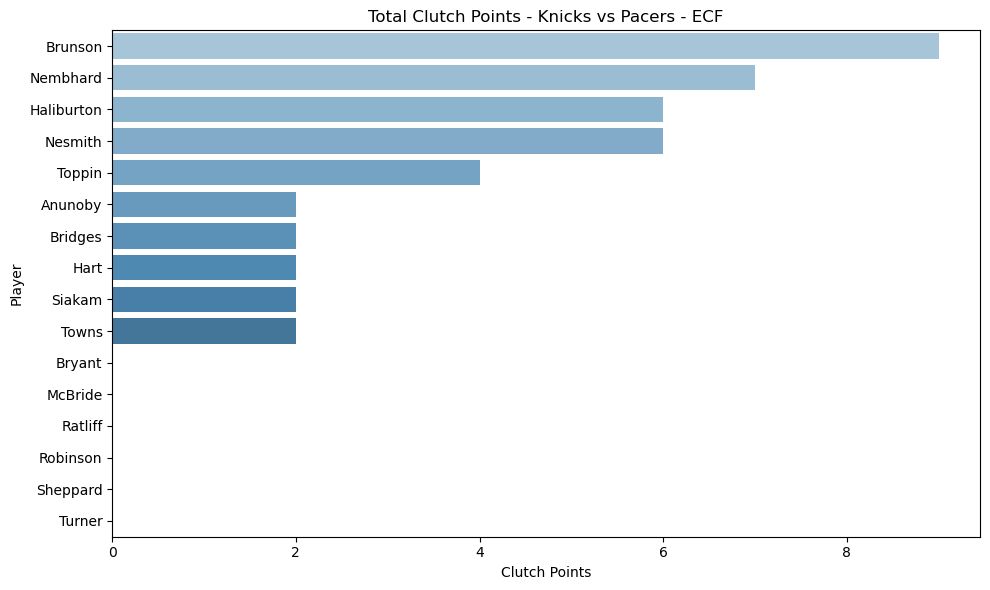

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

top_scorers = clutch_stats.sort_values('PTS', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_scorers, x='PTS', y='playerName', palette='Blues_d')
plt.title('Total Clutch Points - Knicks vs Pacers - ECF')
plt.xlabel('Clutch Points')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

C:\Users\potty\AppData\Local\Temp\ipykernel_17060\3897688557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scorers, x='FG%', y='playerName', palette='Blues_d')


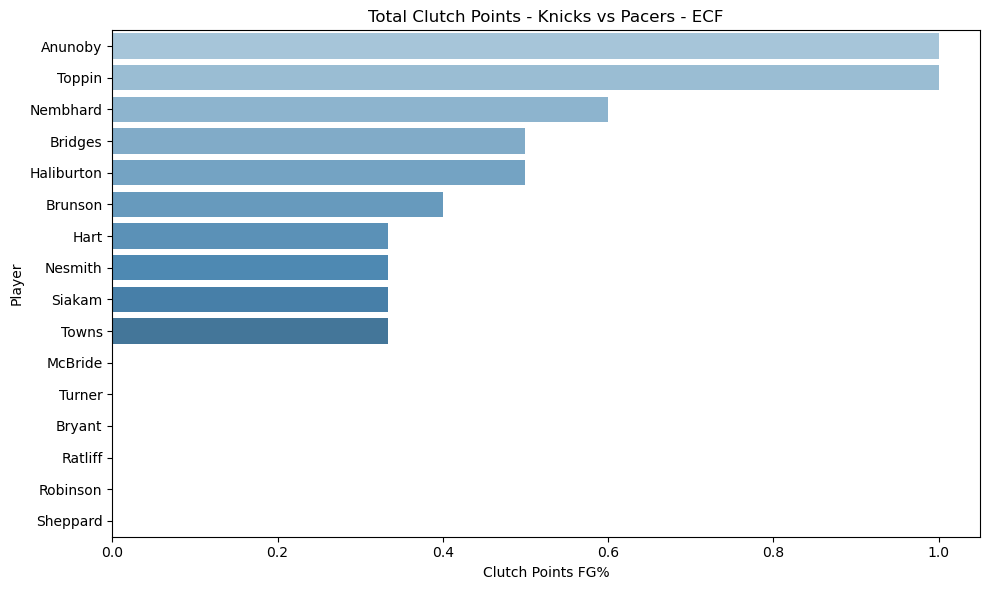

In [144]:
top_scorers = clutch_stats.sort_values('FG%', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_scorers, x='FG%', y='playerName', palette='Blues_d')
plt.title('Total Clutch Points - Knicks vs Pacers - ECF')
plt.xlabel('Clutch Points FG%')
plt.ylabel('Player')
plt.tight_layout()
plt.show()